# MaxQuant (MQ) Output-Files

Files compared:
1. `Summary.txt`
2. `mqpar.xml`
3. `peptides.txt`
4. `proteins.txt`

There is are many files more, where several files seem to be available in several times in different formats.

In [1]:
FILEPATH_UTILS = '/src/maxquant/utils.py'
import os
os.makedirs(os.path.dirname(FILEPATH_UTILS), exist_ok=True)

In [ ]:
#%%writefile /src/maxquant/utils.py

import os
from pathlib import Path

import pandas as pd
import ipywidgets as widgets

def check_for_key(iterable, key):
    hits = [x for x in iterable if key in x]
    n_hits = len(hits)
    if n_hits == 1:
        return hits[0]
    elif n_hits == 0:
        return 0
    elif n_hits > 1:
        return '_'.join(iterable)
    
def search_files(path='.', query='.txt'):
    path = Path(path)
    files= []
    for p in path.rglob("*"):
         if query in p.name:
            files.append(str(p.relative_to('.')))
    return files

def process_files(handler_fct, filepaths):
    for i, _file in enumerate(filepaths):
        if i == 0:
            df = handler_fct(_file)
        else:
            df = df.join(handler_fct(_file), how='outer', rsuffix=i)
    return df


def load_summary(filepath:str='summary.txt')-> pd.DataFrame:
    """Load MaxQuant summary.txt file"""
    df = pd.read_table(filepath)
    df = df.T
    df = df.iloc[:,:-1]
    return df

import xmltodict
def load_mqpar_xml(filepath):
    """Load mqpar.xml file. Stores parameters of a MaxQuant run, including version numbers."""
    with open(filepath) as f:
        _ = f.readline()
        xml = f.read()
        return pd.DataFrame(xmltodict.parse(xml))

from numpy import dtype
types_peptides = {'N-term cleavage window': dtype('O'),
 'C-term cleavage window': dtype('O'),
 'Amino acid before': dtype('O'),
 'First amino acid': dtype('O'),
 'Second amino acid': dtype('O'),
 'Second last amino acid': dtype('O'),
 'Last amino acid': dtype('O'),
 'Amino acid after': dtype('O'),
 'A Count': dtype('int64'),
 'R Count': dtype('int64'),
 'N Count': dtype('int64'),
 'D Count': dtype('int64'),
 'C Count': dtype('int64'),
 'Q Count': dtype('int64'),
 'E Count': dtype('int64'),
 'G Count': dtype('int64'),
 'H Count': dtype('int64'),
 'I Count': dtype('int64'),
 'L Count': dtype('int64'),
 'K Count': dtype('int64'),
 'M Count': dtype('int64'),
 'F Count': dtype('int64'),
 'P Count': dtype('int64'),
 'S Count': dtype('int64'),
 'T Count': dtype('int64'),
 'W Count': dtype('int64'),
 'Y Count': dtype('int64'),
 'V Count': dtype('int64'),
 'U Count': dtype('int64'),
 'O Count': dtype('int64'),
 'Length': dtype('int64'),
 'Missed cleavages': dtype('int64'),
 'Mass': dtype('float64'),
 'Proteins': dtype('O'),
 'Leading razor protein': dtype('O'),
 'Start position': dtype('float64'),
 'End position': dtype('float64'),
 'Gene names': dtype('O'),
 'Protein names': dtype('O'),
 'Unique (Groups)': dtype('O'),
 'Unique (Proteins)': dtype('O'),
 'Charges': dtype('O'),
 'PEP': dtype('float64'),
 'Score': dtype('float64'),
 'Intensity': dtype('int64'),
 'Reverse': dtype('O'),
 'Potential contaminant': dtype('O'),
 'id': dtype('int64'),
 'Protein group IDs': dtype('O'),
 'Mod. peptide IDs': dtype('O'),
 'Evidence IDs': dtype('O'),
 'MS/MS IDs': dtype('O'),
 'Best MS/MS': dtype('float64'),
 'Oxidation (M) site IDs': dtype('O'),
 'MS/MS Count': dtype('int64')}

def load_peptide_intensities(filepath):
    """Load Intensities from `peptides.txt`."""
    df = pd.read_table(filepath, index_col='Sequence', dtype=types_peptides)
    return df[['Intensity']]

dtypes_proteins = {'Protein IDs': dtype('O'),
 'Majority protein IDs': dtype('O'),
 'Peptide counts (all)': dtype('O'),
 'Peptide counts (razor+unique)': dtype('O'),
 'Peptide counts (unique)': dtype('O'),
 'Protein names': dtype('O'),
 'Gene names': dtype('O'),
 'Fasta headers': dtype('O'),
 'Number of proteins': dtype('int64'),
 'Peptides': dtype('int64'),
 'Razor + unique peptides': dtype('int64'),
 'Unique peptides': dtype('int64'),
 'Sequence coverage [%]': dtype('float64'),
 'Unique + razor sequence coverage [%]': dtype('float64'),
 'Unique sequence coverage [%]': dtype('float64'),
 'Mol. weight [kDa]': dtype('float64'),
 'Sequence length': dtype('int64'),
 'Sequence lengths': dtype('O'),
 'Q-value': dtype('float64'),
 'Score': dtype('float64'),
 'Intensity': dtype('int64'),
 'MS/MS count': dtype('int64'),
 'Only identified by site': dtype('O'),
 'Reverse': dtype('O'),
 'Potential contaminant': dtype('O'),
 'id': dtype('int64'),
 'Peptide IDs': dtype('O'),
 'Peptide is razor': dtype('O'),
 'Mod. peptide IDs': dtype('O'),
 'Evidence IDs': dtype('O'),
 'MS/MS IDs': dtype('O'),
 'Best MS/MS': dtype('O'),
 'Oxidation (M) site IDs': dtype('O'),
 'Oxidation (M) site positions': dtype('O'),
 'Taxonomy IDs': dtype('O')}
    
def load_protein_intensities(filepath):
    """Load Intensities from `proteins.txt`."""
    df = pd.read_table(filepath, index_col='Majority protein IDs', dtype=dtypes_proteins)
    return df[['Intensity']]

All Text based Files in a folder:

In [3]:
paths_summaries = search_files(path='data', query='.txt')
w_file = widgets.Dropdown(options=paths_summaries, description='Select a file')
w_file

Dropdown(description='Select a file', options=('data\\denoms\\data\\hela\\MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_…

## MQ Summary files

In [4]:
paths_summaries = search_files(path='data', query='summary.txt')
w_file = widgets.Dropdown(options=paths_summaries, description='Select a file')
w_file

Dropdown(description='Select a file', options=('data\\denoms\\data\\hela\\MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_…

### File Handler

In [5]:
load_summary??

Signature: load_summary(filepath: str = 'summary.txt') -> pandas.core.frame.DataFrame
Source:   
def load_summary(filepath:str='summary.txt')-> pd.DataFrame:
    """Load MaxQuant summary.txt file"""
    df = pd.read_table(filepath)
    df = df.T
    df = df.iloc[:,:-1]
    return df
File:      c:\users\kzl465\documents\vaep\project\<ipython-input-2-7abe92bfd588>
Type:      function


In [6]:
col_names = [check_for_key(iterable=path.split(os.sep), key='MQ') for path in paths_summaries] # integrate into process_files

### Summaries

In [7]:
df = process_files(handler_fct=load_summary, filepaths=paths_summaries)
df.columns = col_names
df

,MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200327,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200330,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_200331,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_02_200331
Av. Absolute Mass Deviation [mDa],0.62535,0.63438,0.56985,0.5985
Av. Absolute Mass Deviation [ppm],0.88479,0.90027,0.78262,0.82919
Enzyme,Trypsin/P,Trypsin/P,Trypsin/P,Trypsin/P
Enzyme first search,NaN,NaN,NaN,NaN
Enzyme mode,Specific,Specific,Specific,Specific
Enzyme mode first search,NaN,NaN,NaN,NaN
Fixed modifications,Carbamidomethyl (C),NaN,Carbamidomethyl (C),Carbamidomethyl (C)
Isotope Patterns,181553,188577,228606,193186
Isotope Patterns Repeatedly Sequenced,12902,12923,9687,12155
Isotope Patterns Repeatedly Sequenced [%],16,15.91,10,14


## MaxQuant Parameter File

In [8]:
paths_parameters = search_files(path='data', query='mqpar.xml')
w_file = widgets.Dropdown(options=paths_parameters, description='Select a file')
display(w_file)

Dropdown(description='Select a file', options=('data\\denoms\\data\\hela\\MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_…

### Parameter Files

In [9]:
load_mqpar_xml??

Signature: load_mqpar_xml(filepath)
Source:   
def load_mqpar_xml(filepath):
    """Load mqpar.xml file. Stores parameters of a MaxQuant run, including version numbers."""
    with open(filepath) as f:
        _ = f.readline()
        xml = f.read()
        return pd.DataFrame(xmltodict.parse(xml))
File:      c:\users\kzl465\documents\vaep\project\<ipython-input-2-7abe92bfd588>
Type:      function


In [10]:
df = process_files(handler_fct=load_mqpar_xml, filepaths=paths_parameters) 
df.columns = col_names
pd.set_option('max_rows', 130)
df

,MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200327,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200330,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_200331,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_02_200331
@aifCorrelation,0,NaN,NaN,NaN
@aifCorrelationFirstPass,0,NaN,NaN,NaN
@aifIsoWeight,0,NaN,NaN,NaN
@aifIterative,false,NaN,NaN,NaN
@aifMinMass,0,NaN,NaN,NaN
...,...,...,...,...
writeMsmsScansTable,NaN,True,True,True
writeMzRangeTable,NaN,True,True,True
writeMzTab,NaN,False,False,False
writePasefMsmsScansTable,NaN,True,True,True


## Peptides

In [11]:
paths_peptides = search_files(path='data', query='peptides.txt')
paths_peptides

['data\\denoms\\data\\hela\\MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200327\\combined\\txt\\peptides.txt',
 'data\\denoms\\data\\hela\\MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200330\\combined\\txt\\peptides.txt',
 'data\\denoms\\data\\hela\\MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_200331\\combined\\txt\\peptides.txt',
 'data\\denoms\\data\\hela\\MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_02_200331\\combined\\txt\\peptides.txt']

In [12]:
df = pd.read_table(paths_peptides[1], index_col='Sequence')
pd.set_option('max_columns', 60)
# types = dict(df.dtypes)
df

,N-term cleavage window,C-term cleavage window,Amino acid before,First amino acid,Second amino acid,Second last amino acid,Last amino acid,Amino acid after,A Count,R Count,N Count,D Count,C Count,Q Count,E Count,G Count,H Count,I Count,L Count,K Count,M Count,F Count,P Count,S Count,T Count,W Count,Y Count,V Count,U Count,O Count,Length,Missed cleavages,Mass,Proteins,Leading razor protein,Start position,End position,Gene names,Protein names,Unique (Groups),Unique (Proteins),Charges,PEP,Score,Intensity,Reverse,Potential contaminant,id,Protein group IDs,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,MS/MS Count
Sequence,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAAAAAAAAPAAAATAPTTAATTAATAAQ,GLKKRDKKNKTKKTKAAAAAAAAAPAAAAT,TAPTTAATTAATAAQ_______________,K,A,A,A,Q,-,20,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,6,0,0,0,0,0,29,0,2367.20300,P37108;H0YLW0,P37108,108.0,136.0,SRP14,Signal recognition particle 14 kDa protein,yes,no,3,1.111200e-03,23.790,908220000,NaN,NaN,0,1660,0,0,0,0.0,NaN,1
AAAAAAALQAK,TILRQARNHKLRVDKAAAAAAALQAKSDEK,RVDKAAAAAAALQAKSDEKAAVAGKKPVVG,K,A,A,A,K,S,8,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,11,0,955.54508,P36578;H3BM89;H3BU31,P36578,354.0,364.0,RPL4,60S ribosomal protein L4,yes,no,2,2.555600e-02,28.174,2652100000,NaN,NaN,1,1655,1,1,1,1.0,NaN,1
AAAAAAGAASGLPGPVAQGLK,______________________________,GAASGLPGPVAQGLKEALVDTLTGILSPVQ,M,A,A,L,K,E,9,0,0,0,0,1,0,4,0,0,2,1,0,0,2,1,0,0,0,1,0,0,21,0,1747.95810,Q96P70,Q96P70,2.0,22.0,IPO9,Importin-9,yes,yes,2,7.689200e-05,57.836,111990000,NaN,NaN,2,2579,2,2,2,2.0,NaN,1
AAAAAAGAGPEMVR,______________________________,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSY,M,A,A,V,R,G,7,1,0,0,0,0,1,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,14,0,1241.61870,P28482-2;P28482,P28482-2,2.0,15.0,MAPK1,Mitogen-activated protein kinase 1,yes,no,2,1.688100e-05,78.655,39016000,NaN,NaN,3,1588,3,3,3,3.0,NaN,1
AAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGAR,______________________________,GAGPCATVSVFPGARLLTIGDANGEIQRHA,M,A,A,A,R,L,12,1,0,0,1,0,0,9,0,0,0,0,0,1,4,2,1,0,0,4,0,0,35,0,2906.44570,Q86X55-2;Q86X55-1;Q86X55;K7EK20;K7EPK1,Q86X55-2,2.0,36.0,CARM1,Histone-arginine methyltransferase CARM1,yes,no,3,4.335600e-20,67.283,76996000,NaN,NaN,4,2369,4,4,4,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YYTPTISR,AHGYGAFLTLSILDRYYTPTISRERAVELL,TLSILDRYYTPTISRERAVELLRKCLEELQ,R,Y,Y,S,R,E,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2,0,2,0,0,0,8,0,999.50255,P49721;A0A087WVV1,P49721,146.0,153.0,PSMB2,Proteasome subunit beta type-2,yes,no,2,1.069800e-02,63.565,60341000,NaN,NaN,14906,1750,15056,16775,18336,18336.0,NaN,1
YYTPVPCESATAK,IYVFPDRPKDEVYSKYYTPVPCESATAKAV,SKYYTPVPCESATAKAVDGYVKPQIKQVVP,K,Y,Y,A,K,A,2,0,0,0,1,0,1,0,0,0,0,1,0,0,2,1,2,0,2,1,0,0,13,0,1485.68100,P51692,P51692,682.0,694.0,STAT5B,Signal transducer and activator of transcripti...,yes,yes,2,1.648700e-02,26.514,27435000,NaN,NaN,14907,1785,15057,16776,18337,18337.0,NaN,1
YYTSASGDEMVSLK,HEDSQNRKKLSELLRYYTSASGDEMVSLKD,RYYTSASGDEMVSLKDYCTRMKENQKHIYY,R,Y,Y,L,K,D,1,0,0,1,0,0,1,1,0,0,1,1,1,0,0,3,1,0,2,1,0,0,14,0,1549.69700,P07900;P07900-2,P07900,465.0,478.0,HSP90AA1,Heat shock protein HSP 90-alpha,yes,no,2,9.708900e-05,72.006,370960000,NaN,NaN,14908,1384,15058,16777,18338;18339,18339.0,NaN,2


### File-Handler

In [13]:
load_peptide_intensities??

Signature: load_peptide_intensities(filepath)
Source:   
def load_peptide_intensities(filepath):
    """Load Intensities from `peptides.txt`."""
    df = pd.read_table(filepath, index_col='Sequence', dtype=types_peptides)
    return df[['Intensity']]
File:      c:\users\kzl465\documents\vaep\project\<ipython-input-2-7abe92bfd588>
Type:      function


### Load Peptide Intensities

In [14]:
peptides = process_files(handler_fct=load_peptide_intensities, filepaths=paths_peptides) 
peptides.columns = col_names

In [15]:
pd.options.display.float_format = '{:,.0f}'.format
peptides.style.set_properties(align='center')
peptides.sort_index()

,MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200327,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200330,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_200331,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_02_200331
Sequence,,,,
AAAAAAAAAAAAAAAGAGAGAK,nan,nan,nan,"20,741,000"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,"986,270,000","908,220,000","1,221,000,000","1,049,400,000"
AAAAAAAAAVSR,nan,nan,nan,"41,948,000"
AAAAAAAGDSDSWDADAFSVEDPVRK,nan,nan,"176,000,000",nan
AAAAAAALQAK,"2,652,100,000","2,652,100,000","2,442,400,000","3,149,100,000"
...,...,...,...,...
YYTPVPCESATAK,"27,435,000","27,435,000","31,148,000","37,955,000"
YYTSASGDEMVSLK,"370,960,000","370,960,000","524,140,000","403,350,000"
YYVTIIDAPGHR,"424,700,000","424,700,000","116,770,000","75,107,000"


In [16]:
peptides.isna().sum()

MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200327                    15291
MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200330                   16599
MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_200331    12409
MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_02_200331                   13903
dtype: int64

In [17]:
peptides.index.to_series()

Sequence
AAAAAAAAAAAAAAAGAGAGAK                  AAAAAAAAAAAAAAAGAGAGAK
AAAAAAAAAPAAAATAPTTAATTAATAAQ    AAAAAAAAAPAAAATAPTTAATTAATAAQ
AAAAAAAAAVSR                                      AAAAAAAAAVSR
AAAAAAAGDSDSWDADAFSVEDPVRK          AAAAAAAGDSDSWDADAFSVEDPVRK
AAAAAAALQAK                                        AAAAAAALQAK
                                             ...              
YYTPVPCESATAK                                    YYTPVPCESATAK
YYTSASGDEMVSLK                                  YYTSASGDEMVSLK
YYVTIIDAPGHR                                      YYVTIIDAPGHR
YYVTIIDAPGHRDFIK                              YYVTIIDAPGHRDFIK
YYYQGCASWK                                          YYYQGCASWK
Name: Sequence, Length: 31510, dtype: object

- average length, max, min, etc.
- overlap

## Proteins

In [18]:
paths_proteins = search_files(path='data', query='proteinGroups.txt')
paths_proteins

['data\\denoms\\data\\hela\\MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200327\\combined\\txt\\proteinGroups.txt',
 'data\\denoms\\data\\hela\\MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200330\\combined\\txt\\proteinGroups.txt',
 'data\\denoms\\data\\hela\\MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_200331\\combined\\txt\\proteinGroups.txt',
 'data\\denoms\\data\\hela\\MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_02_200331\\combined\\txt\\proteinGroups.txt']

In [19]:
run_protein = pd.read_table(paths_proteins[2])
run_protein

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,Sequence coverage [%],Unique + razor sequence coverage [%],Unique sequence coverage [%],Mol. weight [kDa],Sequence length,Sequence lengths,Q-value,Score,Intensity,MS/MS count,Only identified by site,Reverse,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
0,A0A024QZP7;P06493;A0A087WZZ9;E5RIU6;P06493-2,A0A024QZP7;P06493;A0A087WZZ9;E5RIU6;P06493-2,10;10;8;7;7,10;10;8;7;7,9;9;7;6;7,Cyclin-dependent kinase 1,CDC2;CDK1,A0A024QZP7;P06493;A0A087WZZ9;E5RIU6;P06493-2,5,10,10,9,41,41,39,34,297,297;297;224;189;240,0,67,2030700000,12,NaN,NaN,NaN,0,461;7829;8399;8731;10940;11878;14980;15472;187...,True;True;True;True;True;True;True;True;True;True,469;7898;8471;8804;11025;11990;15111;15607;189...,516;8859;9499;9875;12357;13412;16873;17409;211...,530;9228;9886;10274;12845;13936;17542;18097;22...,530;9228;9886;10274;12845;13936;17542;18097;22...,NaN,NaN,9606;9606;9606;9606;9606
1,A0A024QZX5;A0A087X1N8;P35237;A0A2R8YD12;A0A2R8...,A0A024QZX5;A0A087X1N8;P35237;A0A2R8YD12;A0A2R8...,10;10;10;8;5;2;2;1;1,10;10;10;8;5;2;2;1;1,10;10;10;8;5;2;2;1;1,Serpin B6,SERPINB6,A0A024QZX5;A0A087X1N8;P35237;A0A2R8YD12;A0A2R8...,9,10,10,10,40,40,40,43,380,380;395;376;332;171;61;77;60;81,0,292,1545800000,11,NaN,NaN,NaN,1,271;5315;5978;6584;6880;9064;10739;12332;14427...,True;True;True;True;True;True;True;True;True;True,274;5362;6029;6637;6937;9139;10822;12450;14555...,305;5979;6741;7437;7778;10258;12124;13923;1625...,316;6236;7032;7753;8103;10684;12602;14473;1689...,316;6236;7032;7753;8103;10684;12602;14473;1689...,NaN,NaN,9606;9606;9606;9606;9606;9606;9606;9606;9606
2,F8WF22;A0A024R341;Q6I9Y2,F8WF22;A0A024R341;Q6I9Y2,1;1;1,1;1;1,1;1;1,THO complex subunit 7 homolog,THOC7;NIF3L1BP1,F8WF22;A0A024R341;Q6I9Y2,3,1,1,1,23,23,23,7,60,60;152;204,0,7,58480000,1,NaN,NaN,NaN,2,11251,True,11348,12707,13216,13216,NaN,NaN,9606;9606;9606
3,E7EMB6;A0A024R442;E7ETB3;Q9ULA0;C9JBE1;C9J1E2;...,E7EMB6;A0A024R442;E7ETB3;Q9ULA0;C9JBE1,3;3;3;3;2;1;1,3;3;3;3;2;1;1,3;3;3;3;2;1;1,Aspartyl aminopeptidase,DNPEP,E7EMB6;A0A024R442;E7ETB3;Q9ULA0;C9JBE1,7,3,3,3,18,18,18,45,410,410;471;493;475;331;137;273,0,27,205660000,2,NaN,NaN,NaN,3,5547;8978;11829,True;True;True,5595;9053;11941,6236;10163;13356,6501;10586;13879,6501;10586;13879,NaN,NaN,9606;9606;9606;9606;9606;9606;9606
4,A0A024R4E5;Q00341;Q00341-2;H0Y394;H7C0A4;H7C2D...,A0A024R4E5;Q00341;Q00341-2;H0Y394,27;26;23;21;6;6;4;4;4;4;3;3;3;2;2;2;2;2;1;1;1,27;26;23;21;6;6;4;4;4;4;3;3;3;2;2;2;2;2;1;1;1,27;26;23;21;6;6;4;4;4;4;3;3;3;2;2;2;2;2;1;1;1,Vigilin,HDLBP,A0A024R4E5;Q00341;Q00341-2;H0Y394,21,27,27,27,27,27,27,141,1268,1268;1268;1235;973;332;308;267;224;221;164;147...,0,244,2551500000,28,NaN,NaN,NaN,4,47;466;1191;2179;2586;2765;3257;3258;3841;3910...,True;True;True;True;True;True;True;True;True;T...,47;474;1206;2203;2613;2795;3290;3291;3879;3948...,50;521;1337;1338;2456;2914;3126;3683;3684;4337...,52;536;1389;1390;2560;3039;3282;3866;3867;4547...,52;536;1389;2560;3039;3282;3866;3867;4547;4627...,NaN,NaN,9606;9606;9606;9606;9606;9606;9606;9606;9606;9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,REV__S4R3Y2;REV__Q9BY10,REV__S4R3Y2;REV__Q9BY10,1;1,1;1,1;1,NaN,NaN,S4R3Y2;Q9BY10,2,1,1,1,0,0,0,36,341,341;475,0,6,16896000,1,NaN,+,NaN,3425,10452,True,10534,11802,12275,12275,NaN,NaN,9606;9606
3426,REV__Q9NRC6,REV__Q9NRC6,1,1,1,NaN,NaN,Q9NRC6,1,1,1,1,0,0,0,417,3674,3674,0,6,9398800000,1,NaN,+,NaN,3426,16867,True,17011,19007,19767,19767,NaN,NaN,9606
3427,REV__Q9Y2Q0-3;REV__Q9Y2Q0-2;REV__Q9Y2Q0,REV__Q9Y2Q0-3;REV__Q9Y2Q0-2;REV__Q9Y2Q0,1;1;1,1;1;1,1;1;1,NaN,NaN,Q9Y2Q0-3;Q9Y2Q0-2;Q9Y2Q0,3,1,1,1,0,0,0,130,1149,1149;1149;1164,0,

### Most proteins are grouped
- How many proteins are grouped together for one intensity value?
- Are proteins uniquely placed into one of the protein groups?

Text(0, 0.5, 'Frequency')

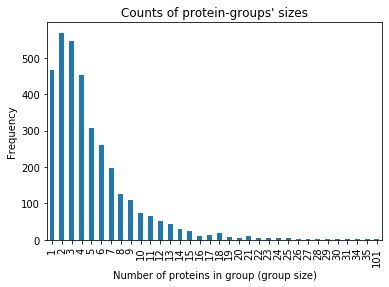

In [20]:
ax = run_protein["Number of proteins"].value_counts().sort_index().plot(kind='bar', title='Counts of protein-groups\' sizes')
ax.set_xlabel('Number of proteins in group (group size)')
ax.set_ylabel('Frequency')

In [21]:
protein_index = run_protein["Protein IDs"].str.split(';').apply(set)
protein_index.apply(len).sum()

17257

In [22]:
protein_index.apply(len)

0        5
1        9
2        3
3        7
4       21
        ..
3425     2
3426     1
3427     3
3428     1
3429     8
Name: Protein IDs, Length: 3430, dtype: int64

In [23]:
protein_index_set = set()
for _set in protein_index:
    protein_index_set = protein_index_set.union(_set)
len(protein_index_set)

17257

Unique entries

### Load Protein Intensities
- by all proteins
- by majority proteins

In [24]:
dtypes_proteins = run_protein.dtypes.to_dict()
dtypes_proteins

{'Protein IDs': dtype('O'),
 'Majority protein IDs': dtype('O'),
 'Peptide counts (all)': dtype('O'),
 'Peptide counts (razor+unique)': dtype('O'),
 'Peptide counts (unique)': dtype('O'),
 'Protein names': dtype('O'),
 'Gene names': dtype('O'),
 'Fasta headers': dtype('O'),
 'Number of proteins': dtype('int64'),
 'Peptides': dtype('int64'),
 'Razor + unique peptides': dtype('int64'),
 'Unique peptides': dtype('int64'),
 'Sequence coverage [%]': dtype('float64'),
 'Unique + razor sequence coverage [%]': dtype('float64'),
 'Unique sequence coverage [%]': dtype('float64'),
 'Mol. weight [kDa]': dtype('float64'),
 'Sequence length': dtype('int64'),
 'Sequence lengths': dtype('O'),
 'Q-value': dtype('float64'),
 'Score': dtype('float64'),
 'Intensity': dtype('int64'),
 'MS/MS count': dtype('int64'),
 'Only identified by site': dtype('O'),
 'Reverse': dtype('O'),
 'Potential contaminant': dtype('O'),
 'id': dtype('int64'),
 'Peptide IDs': dtype('O'),
 'Peptide is razor': dtype('O'),
 'Mod. p

In [25]:
load_protein_intensities??

Signature: load_protein_intensities(filepath)
Source:   
def load_protein_intensities(filepath):
    """Load Intensities from `proteins.txt`."""
    df = pd.read_table(filepath, index_col='Majority protein IDs', dtype=dtypes_proteins)
    return df[['Intensity']]
File:      c:\users\kzl465\documents\vaep\project\<ipython-input-2-7abe92bfd588>
Type:      function


In [26]:
proteins = process_files(handler_fct=load_protein_intensities, filepaths=paths_proteins) 

In [27]:
proteins.columns = col_names

In [28]:
proteins

,MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200327,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200330,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_200331,MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_02_200331
Majority protein IDs,,,,
A0A024QZP7;P06493-2;P06493;A0A087WZZ9;E5RIU6,nan,nan,nan,"489,600,000"
A0A024QZP7;P06493;A0A087WZZ9;E5RIU6;P06493-2,nan,"523,870,000","2,030,700,000",nan
A0A024QZP7;P06493;A0A087WZZ9;P06493-2;E5RIU6,"523,870,000",nan,nan,nan
A0A024QZX5;A0A087X1N8;P35237;A0A2R8YD12,nan,nan,nan,"1,312,500,000"
A0A024QZX5;A0A087X1N8;P35237;A0A2R8YD12;A0A2R8Y6A7,nan,nan,"1,545,800,000",nan
...,...,...,...,...
X6RLT1;H0UI80;Q8IXH7-4;Q8IXH7,nan,nan,"107,280,000","91,458,000"
X6RM00;G8JLD3;X6RLX0;Q8IUD2-4;Q8IUD2-2;Q8IUD2-3;Q8IUD2;Q8IUD2-5,"146,540,000","146,540,000",nan,"187,180,000"
X6RM00;G8JLD3;X6RLX0;Q8IUD2-4;Q8IUD2-2;Q8IUD2-3;Q8IUD2;Q8IUD2-5;K7EPD6;A0A0U1RQN0,nan,nan,"103,780,000",nan


In [29]:
proteins.isna().sum()

MQ1.6.0.1_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200327                    4082
MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_200330                   4165
MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_200331    3765
MQ1.6.1.12_20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_02_200331                   3899
dtype: int64